In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Each Pad

In [3]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [4]:
from pandas import to_datetime
from pandas import DataFrame
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from glob import glob

md_dict,xt_dict,yt_dict,zt_dict = {}, {}, {}, {}
dict = {'group':[],'well_name':[],
        'LSTM_train_r2':[],'LSTM_train_mae':[],'LSTM_train_rmse':[],
        'LSTM_test_r2':[],'LSTM_test_mae':[],'LSTM_test_rmse':[]}
df_result = pd.DataFrame(dict)

path = "/content/drive/My Drive/Python/OilProduction/Revision/data/"
filenames = glob(path+'prod_df/CritterCreek/'+'*.csv')
for filename in filenames: 
    df = pd.read_csv(filename,usecols=['oil/day'])
    well = str(filename[-17:-4])
    #filename: '/content/drive/My Drive/Python/OilProduction/Revision/data/prod_df/Gobbler/5123359990000.csv'
    # df_a = df[['oil/day']]
    dataset=df.values
    
    # fix random seed for reproducibility
    numpy.random.seed(7)
    # load the dataset
    dataset = dataset.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    # reshape into X=t and Y=t+1
    look_back = 2
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    # plt.plot(scaler.inverse_transform(dataset))
    # plt.plot(trainPredictPlot)
    # plt.plot(testPredictPlot)
    # plt.show()
    
    dict = {'group':'CritterCreek',
           'well_name': well, 
           'LSTM_train_r2':'%.2f'% r2_score(trainY[0], trainPredict[:,0]),
           'LSTM_train_mae':'%.2f'% mean_absolute_error(trainY[0], trainPredict[:,0]),
           'LSTM_train_rmse':'%.2f'% math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])),
           'LSTM_test_r2': '%.2f'% r2_score(testY[0], testPredict[:,0]),
           'LSTM_test_mae': '%.2f'% mean_absolute_error(testY[0], testPredict[:,0]),
           'LSTM_test_rmse':'%.2f'% math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))}
    df_result = df_result.append(dict, ignore_index = True)
    df_result.to_csv(path+'/export/CritterCreek_13wells_LSTM.csv',index=False)
print(df_result)

Epoch 1/100
17/17 - 2s - loss: 0.1734 - 2s/epoch - 106ms/step
Epoch 2/100
17/17 - 0s - loss: 0.1522 - 34ms/epoch - 2ms/step
Epoch 3/100
17/17 - 0s - loss: 0.1320 - 34ms/epoch - 2ms/step
Epoch 4/100
17/17 - 0s - loss: 0.1170 - 36ms/epoch - 2ms/step
Epoch 5/100
17/17 - 0s - loss: 0.1027 - 33ms/epoch - 2ms/step
Epoch 6/100
17/17 - 0s - loss: 0.0920 - 33ms/epoch - 2ms/step
Epoch 7/100
17/17 - 0s - loss: 0.0831 - 35ms/epoch - 2ms/step
Epoch 8/100
17/17 - 0s - loss: 0.0751 - 37ms/epoch - 2ms/step
Epoch 9/100
17/17 - 0s - loss: 0.0697 - 31ms/epoch - 2ms/step
Epoch 10/100
17/17 - 0s - loss: 0.0644 - 32ms/epoch - 2ms/step
Epoch 11/100
17/17 - 0s - loss: 0.0607 - 33ms/epoch - 2ms/step
Epoch 12/100
17/17 - 0s - loss: 0.0586 - 36ms/epoch - 2ms/step
Epoch 13/100
17/17 - 0s - loss: 0.0553 - 37ms/epoch - 2ms/step
Epoch 14/100
17/17 - 0s - loss: 0.0535 - 40ms/epoch - 2ms/step
Epoch 15/100
17/17 - 0s - loss: 0.0519 - 35ms/epoch - 2ms/step
Epoch 16/100
17/17 - 0s - loss: 0.0505 - 35ms/epoch - 2ms/step
E

## 6N

In [23]:
path = "/content/drive/MyDrive/Python/OilProduction/6N/6N_Prod.csv"
df = pd.read_csv(path, 
                #  na_values=[' ',0],
                 usecols=['OilProduced(bbl/day)'])
df.head(5)

,OilProduced(bbl/day)
0,347
1,453
2,332
3,261
4,215


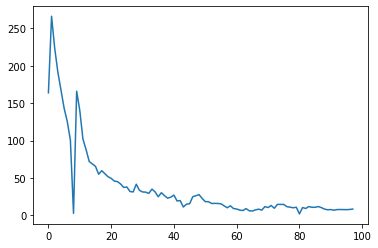

In [28]:
dataset=df.values
plt.plot(dataset)

In [7]:
# LSTM for international airline passengers problem with window regression framing
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv(path, usecols=['OilProduced(bbl/day)'])
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()


Epoch 1/100
56/56 - 2s - loss: 0.0270 - 2s/epoch - 40ms/step
Epoch 2/100
56/56 - 0s - loss: 0.0210 - 101ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 0.0184 - 139ms/epoch - 2ms/step
Epoch 4/100
56/56 - 0s - loss: 0.0170 - 110ms/epoch - 2ms/step
Epoch 5/100
56/56 - 0s - loss: 0.0160 - 105ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 0.0156 - 100ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 0.0140 - 103ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 0.0131 - 115ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 0.0118 - 105ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 0.0107 - 103ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 0.0096 - 109ms/epoch - 2ms/step
Epoch 12/100
56/56 - 0s - loss: 0.0084 - 101ms/epoch - 2ms/step
Epoch 13/100
56/56 - 0s - loss: 0.0073 - 98ms/epoch - 2ms/step
Epoch 14/100
56/56 - 0s - loss: 0.0062 - 103ms/epoch - 2ms/step
Epoch 15/100
56/56 - 0s - loss: 0.0052 - 106ms/epoch - 2ms/step
Epoch 16/100
56/56 - 0s - loss: 0.0043 - 105ms/epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


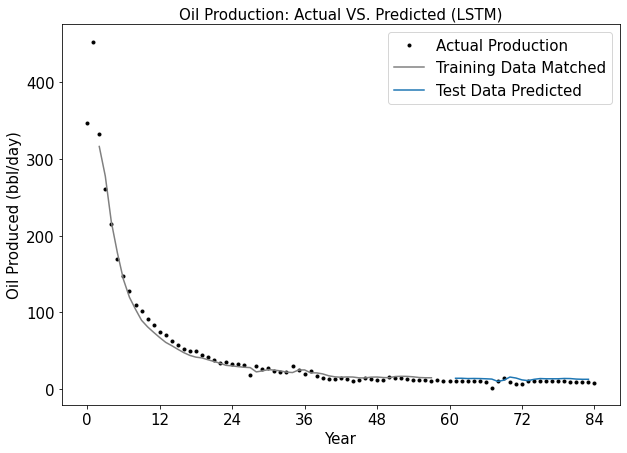

In [8]:
# plot baseline and predictions
plt.figure(figsize=(10,7))

plt.plot(scaler.inverse_transform(dataset),'.',color='black')
plt.plot(trainPredictPlot,"-", color='gray')
plt.plot(testPredictPlot)

plt.title('comparison')
plt.ylabel('Oil Produced (bbl/day)',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.legend(['Actual Production', 'Training Data Matched','Test Data Predicted'], loc='upper right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted (LSTM)',fontsize=15)


ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
# ax.set_ylim(0,1000)
# ax.set_xlim(48,84)


In [9]:
from sklearn.metrics import r2_score,mean_absolute_error

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (testScore))

train_Rsquare = r2_score(trainY[0], trainPredict[:,0])
print('Train R_square: %.2f R_square' % (train_Rsquare))
test_Rsquare = r2_score(testY[0], testPredict[:,0])
print('Test R_square: %.2f R_square' % (test_Rsquare))

train_mae = mean_absolute_error(trainY[0], trainPredict[:,0])
test_mae = mean_absolute_error(testY[0], testPredict[:,0])
print('Train MAE: %.2f ' % (train_mae))
print('Test MAE: %.2f ' % (test_mae))


Train RMSE: 5.79 RMSE
Test RMSE: 4.54 RMSE
Train R_square: 0.99 R_square
Test R_square: -2.96 R_square
Train MAE: 4.59 
Test MAE: 4.01 


In [ ]:
#  1-year prediction results
testScore1 = math.sqrt(mean_squared_error(testY[0][:12], testPredict[:12,0]))
print('1-year Test RMSE: %.2f RMSE' % (testScore1))

test_Rsquare1 = r2_score(testY[0][:12], testPredict[:12,0])
print('1-year Test R_square: %.2f R_square' % (test_Rsquare1))

test_mae1 = mean_absolute_error(testY[0][:12], testPredict[:12,0])
print('1-year Test MAE: %.2f ' % (test_mae1))



1-year Test RMSE: 3.86 RMSE
1-year Test R_square: -0.59 R_square
1-year Test MAE: 3.08 
